In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
while 'ipython' in os.getcwd():
    os.chdir('..')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pdf2image import convert_from_path
from mim_ocr.graph.graph_utils import get_vertex_with_text
from mim_ocr.graph.graph_model import GraphFactory
from mim_ocr.graph.builders import VerticalEdgeBuilder, HorizontalEdgeBuilder, EdgeBuilder, Direction
from mim_ocr.backends import TesseractBackend
from mim_ocr.data_model.box import BoxType, Box
from mim_ocr.graph.visualization import draw_neighbourhood, draw_vertices

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
PATH = Path('tests/input_data/example_report1.png')
image = np.array(Image.open(PATH))

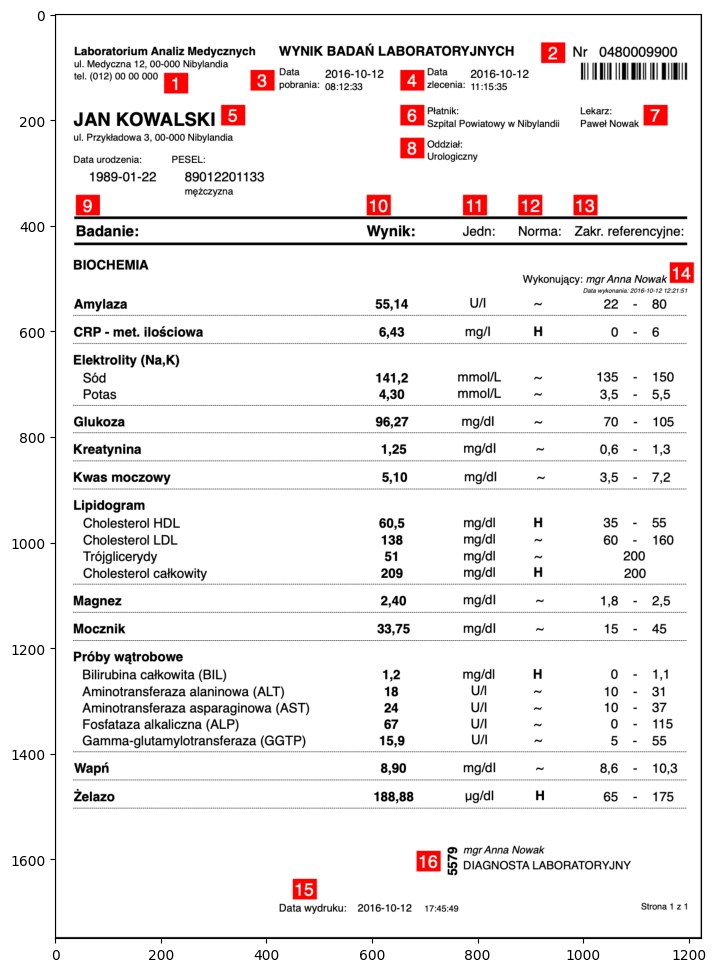

In [25]:
plt.figure(figsize=(10, 12))
plt.imshow(image)
plt.show()

In [27]:
box = TesseractBackend().run_ocr_to_box(image)
gf = GraphFactory(edge_builders=[VerticalEdgeBuilder, HorizontalEdgeBuilder])
graph = gf.build_graph_for_root_box(box, BoxType.TESSERACT_WORD)

v = get_vertex_with_text(text="PESEL", graph=graph)
right = EdgeBuilder.get_neighbours(v, "right")
left = EdgeBuilder.get_neighbours(v, "left")
up = EdgeBuilder.get_neighbours(v, "up")
down = EdgeBuilder.get_neighbours(v, "down")

In [28]:
print(v['box'].text, down[0]['box'].text)

PESEL: 89012201133


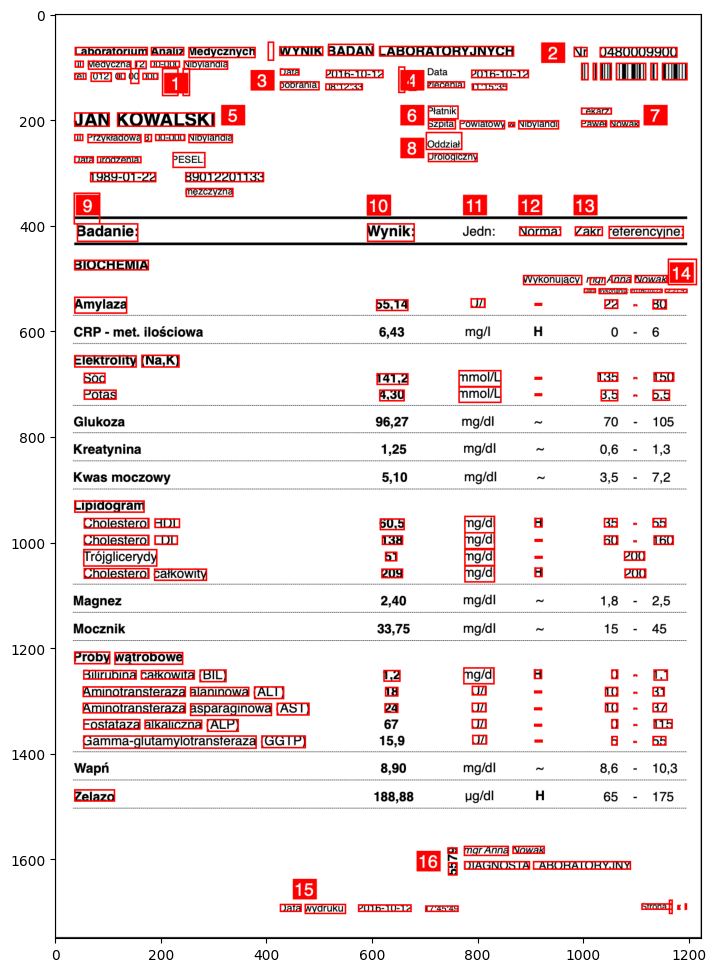

In [29]:
col_image = draw_vertices(graph, image)
plt.figure(figsize=(10, 12))
plt.imshow(col_image)
plt.show()

Neighbours left:


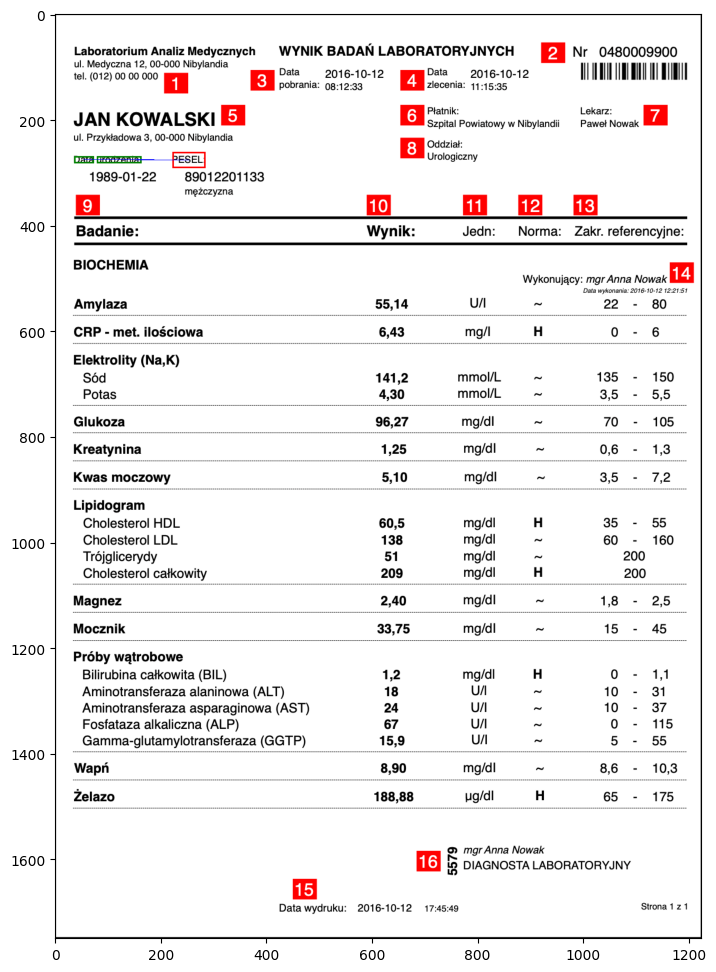

Neighbours up:


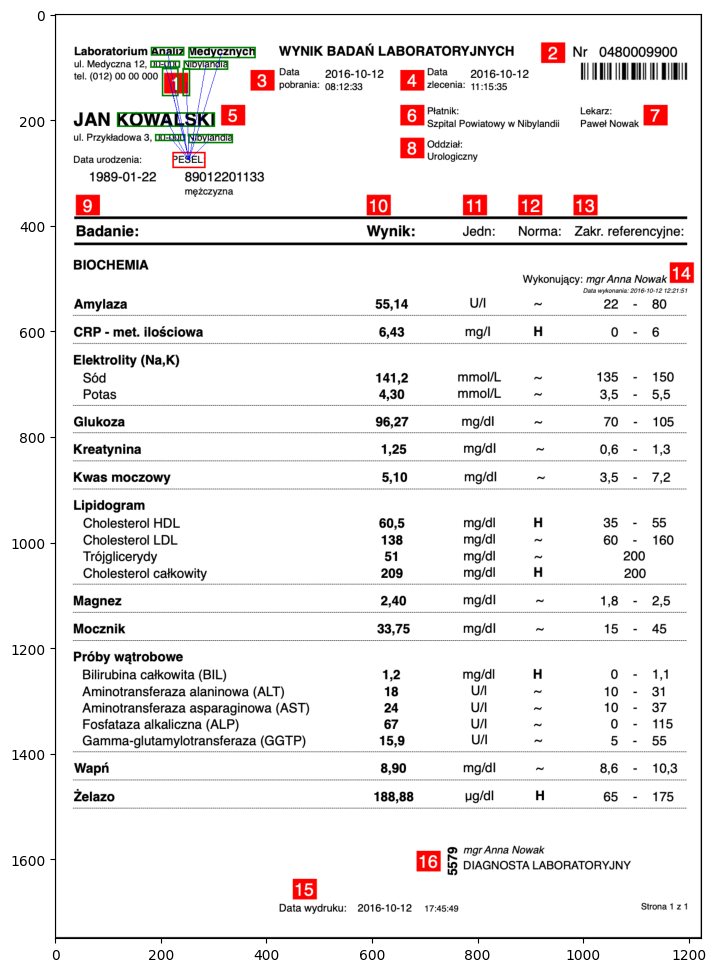

Neighbours right:


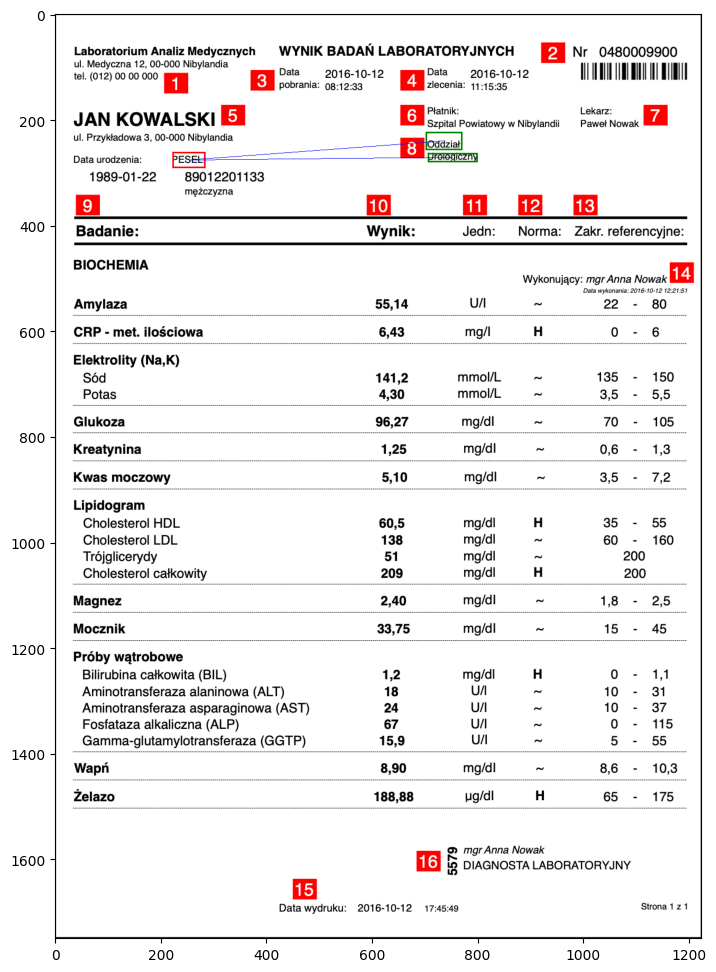

Neighbours down:


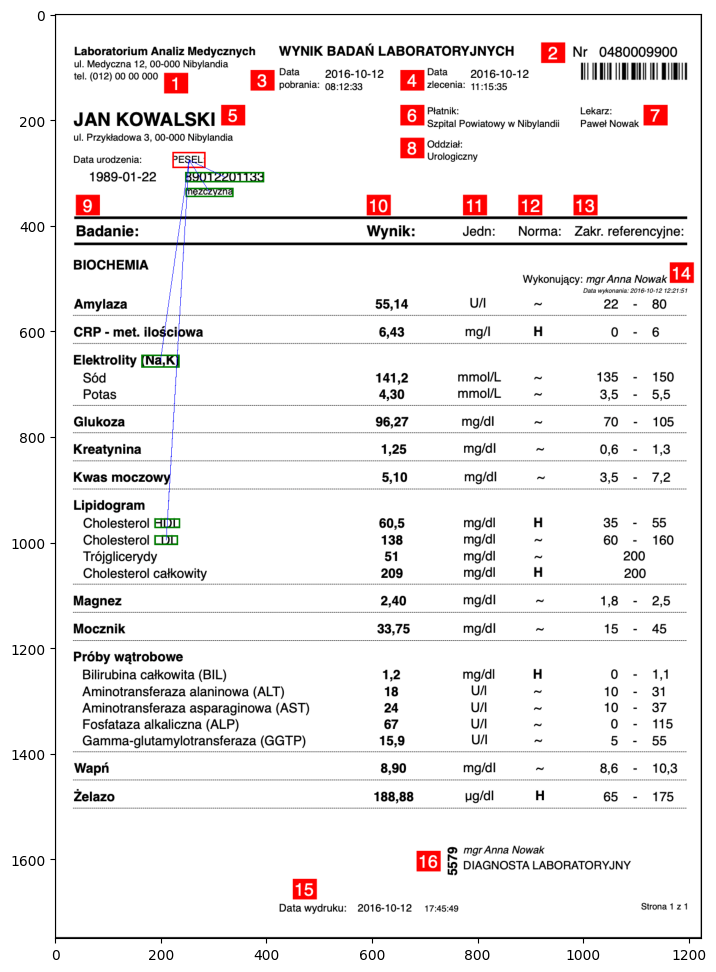

In [30]:
for mode in ['left', 'up', 'right', 'down']:
    print(f'Neighbours {mode}:')
    col_image = draw_neighbourhood(v, image, mode)
    plt.figure(figsize=(10, 12))
    plt.imshow(col_image)
    plt.show()